<h1>Análise Sobre Acidentes de Trânsito em Porto Alegre | RS</h1>
Realizada por <i>Samuel Almeida da Silva</i>.
<br>
<img src='top.jpg'>
<br>
<h2>Introdução</h2>
<br>
Neste documento irei realizar um <i>Storytelling</i> a respeito dos acidentes de trânsito em Porto Alegre - RS, ocorridos no ano de 2016, pois é a base de dados disponibilizada mais recente.
<br>
<br>
Como qualquer capital, a cidade possui uma concentração de pessoas muito grande, atualmente conta com uma população de 1,4 milhão e 825 mil veículos, <a href='http://g1.globo.com/rs/rio-grande-do-sul/transito/noticia/2014/05/com-aumento-de-frota-porto-alegre-tem-1-veiculo-para-cada-18-habitante.html'>isto seria quase 2 veículos por habitante</a>, devido este fato torna-se inevitável acidentes de trânsito. Gerar dados sobre este problema se faz necessário para verificar a melhor maneira de efetuar ações para diminuir a quantidade de acidentes e reduzir o número de vítimas, além de formas para investir melhor em <a href='https://www.correiodopovo.com.br/not%C3%ADcias/geral/com-um-carro-para-cada-duas-pessoas-porto-alegre-estuda-alternativas-para-mobilidade-1.211760'>alternativas de mobilidade</a>. Então será realizada uma <i>Análise Exploratoria de Dados</i> para responder os questionamentos que visualizaremos em seguida.

<h2>Dataset utilizado</h2>
<br>
A prefeitura de Porto Alegre disponibiliza seus dados através do <a href='http://datapoa.com.br/'>Datapoa</a>, portal para divulgação de dados abertos. Neste vamos utilizar os dados em que a EPTC (Empresa Pública de Transporte e Circulação) gerou através de suas ocorrências registradas em 2016, as informações podem ser acessadas <a href='http://datapoa.com.br/dataset/acidentes-de-transito/resource/f67262c7-e602-4b4c-b997-5108002f818c'>clicando aqui</a>. Serão encontrados nesse conjunto de dados: veículos envolvidos, data e hora, clima e local - geolocalização - dos acidentes. 
<br>

<h2>Questionamentos</h2>
<br>
<li>Quais foram os meses com maior quantidade de acidentes durante o ano?</li>
<li>O dia da semana influencia na quantidade de ocorrências? Qual dia possui uma maior quantidade de acidentes?</li>
<li>Qual região da cidade possui maior número de acidentes? E em quais locais ocorreram fatalidades?</li>
<li>As motos são maioria nos acidentes de trânsito da cidade? As mesmas estão mais expostas a fatalidades na capital?</li>
<li>Em quais avenidas ocorreram a maioria dos acidentes? E as fatalidades ocorreram nas mesmas ruas ou a segurança das vias é algo a parte?</li>
<li>As maiores causas dos acidentes são também os maiores motivos das fatalidades?</li>

<h2>Importando as bibliotecas</h2>

In [73]:
!pip install folium

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import folium

<h2>Leitura do Dataset</h2>

In [75]:
df = pd.read_csv('acidentes-2016.csv', sep=';')

In [76]:
df.head()

,ID,LONGITUDE,LATITUDE,LOG1,LOG2,PREDIAL1,LOCAL,TIPO_ACID,LOCAL_VIA,QUEDA_ARR,...,REGIAO,DIA,MES,ANO,FX_HORA,CONT_ACID,CONT_VIT,UPS,CONSORCIO,CORREDOR
0,623243,-51.233864,-30.085209,R ARAPEI,R COMANDAI,0,Cruzamento,ATROPELAMENTO,R ARAPEI & R COMANDAI,0,...,SUL,1,1,2016,14.0,1,1,5,NaN,0
1,622413,-51.231947,-30.108313,R PADRE JOAO BATISTA REUS,R JOAO MORA,0,Cruzamento,ABALROAMENTO,R PADRE JOAO BATISTA REUS & R JOAO MORA,0,...,SUL,1,1,2016,16.0,1,0,1,NaN,0
2,622460,-51.212026,-30.045868,AV DO LAMI,NaN,0,Logradouro,ATROPELAMENTO,AV DO LAMI,0,...,CENTRO,1,1,2016,16.0,1,1,5,NaN,0
3,622540,-51.185614,-30.034456,AV DR NILO PECANHA,R CARLOS TREIN FILHO,0,Cruzamento,CHOQUE,AV DR NILO PECANHA & R CARLOS TREIN FILHO,0,...,LESTE,1,1,2016,5.0,1,0,1,NaN,0
4,622181,-51.097360,-30.131425,ESTR JOAO DE OLIVEIRA REMIAO,NaN,8487,Logradouro,CHOQUE,8487 ESTR JOAO DE OLIVEIRA REMIAO,0,...,LESTE,1,1,2016,12.0,1,1,13,NaN,0


<h2>Data Cleaning</h2>

In [77]:
acidentes = df.drop(['LOG2','PREDIAL1','LOCAL_VIA','QUEDA_ARR','DATA_HORA','FERIDOS_GR','MORTES','MORTE_POST','AUTO',
                     'TAXI','LOTACAO','ONIBUS_URB','ONIBUS_MET','ONIBUS_INT','CAMINHAO','CARROCA','BICICLETA','OUTRO','FONTE',
                     'BOLETIM','DIA','ANO','FX_HORA','CONT_ACID','CONT_VIT','UPS','CONSORCIO','CORREDOR','MES','TEMPO','NOITE_DIA'], axis=1)

In [78]:
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 13 columns):
ID           12515 non-null int64
LONGITUDE    12515 non-null float64
LATITUDE     12515 non-null float64
LOG1         12515 non-null object
LOCAL        12515 non-null object
TIPO_ACID    12515 non-null object
DATA         12515 non-null object
DIA_SEM      12515 non-null object
HORA         12512 non-null object
FERIDOS      12515 non-null int64
FATAIS       12515 non-null int64
MOTO         12515 non-null int64
REGIAO       12515 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB


In [79]:
acidentes['DATA'] = pd.to_datetime(acidentes['DATA'])

In [80]:
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 13 columns):
ID           12515 non-null int64
LONGITUDE    12515 non-null float64
LATITUDE     12515 non-null float64
LOG1         12515 non-null object
LOCAL        12515 non-null object
TIPO_ACID    12515 non-null object
DATA         12515 non-null datetime64[ns]
DIA_SEM      12515 non-null object
HORA         12512 non-null object
FERIDOS      12515 non-null int64
FATAIS       12515 non-null int64
MOTO         12515 non-null int64
REGIAO       12515 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [81]:
acidentes.columns = ['ID','Longitude','Latitude','Rua','Local','Motivo_acidente','Data','Dia_semana','Hora','Feridos','Fatais',
                     'Moto','Regiao']
acidentes['Contagem'] = 1

In [82]:
acidentes.head()

,ID,Longitude,Latitude,Rua,Local,Motivo_acidente,Data,Dia_semana,Hora,Feridos,Fatais,Moto,Regiao,Contagem
0,623243,-51.233864,-30.085209,R ARAPEI,Cruzamento,ATROPELAMENTO,2016-01-01,SEXTA-FEIRA,14:30,1,0,0,SUL,1
1,622413,-51.231947,-30.108313,R PADRE JOAO BATISTA REUS,Cruzamento,ABALROAMENTO,2016-01-01,SEXTA-FEIRA,16:45,0,0,0,SUL,1
2,622460,-51.212026,-30.045868,AV DO LAMI,Logradouro,ATROPELAMENTO,2016-01-01,SEXTA-FEIRA,16:30,1,0,1,CENTRO,1
3,622540,-51.185614,-30.034456,AV DR NILO PECANHA,Cruzamento,CHOQUE,2016-01-01,SEXTA-FEIRA,05:45,0,0,0,LESTE,1
4,622181,-51.097360,-30.131425,ESTR JOAO DE OLIVEIRA REMIAO,Logradouro,CHOQUE,2016-01-01,SEXTA-FEIRA,12:00,0,1,0,LESTE,1


<h2>Data Visualization</h2>
<br>
<h3>Quais foram os meses com maior quantidade de acidentes durante o ano?</h3>

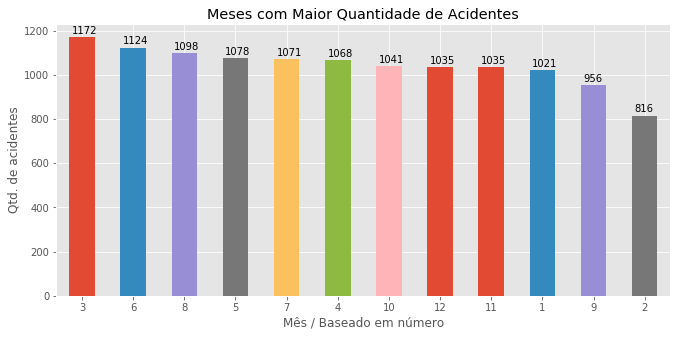

In [83]:
month = acidentes['Data'].dt.month.value_counts().plot(kind='bar', figsize=(11,5))

for p in month.patches:
    b=p.get_bbox()
    month.annotate("{:.0f}". format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.2, b.y1 + 15))

plt.title('Meses com Maior Quantidade de Acidentes')
plt.xlabel('Mês / Baseado em número')
plt.ylabel('Qtd. de acidentes')
plt.xticks(rotation=0)
plt.show()

Através dos <i>plot's</i> acima, validamos que o mês com maior número de acidentes no trânsito foi em Março, porém o que mais chama a atenção é o lado inverso, pois o mês de Fevereiro - onde ocorre muitos acidentes devido ao Carnaval - possui o volume mais baixo de ocorrências.

Esta informação me desperta uma outra curiosidade, possui algum dia da semana onde ocorre mais acidentes?

<h3>O dia da semana influencia na quantidade de ocorrências? Qual dia possui uma maior quantidade de acidentes?</h3>

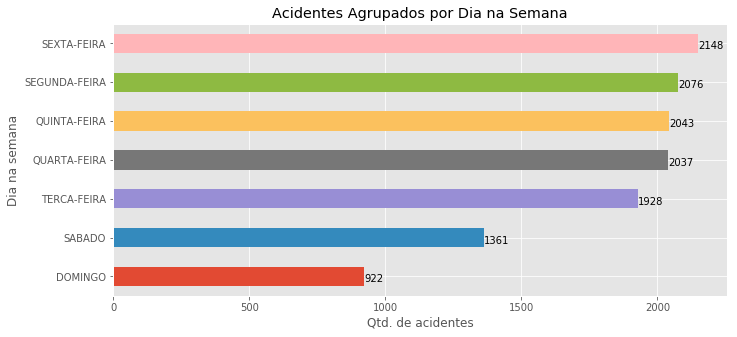

In [84]:
dia_semana = acidentes.groupby('Dia_semana')['Contagem'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(11,5))

for p in dia_semana.patches:
    b=p.get_bbox()
    dia_semana.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.1))

plt.title('Acidentes Agrupados por Dia na Semana')
plt.xlabel('Qtd. de acidentes')
plt.ylabel('Dia na semana')
plt.show()

Na Sexta-Feira é mais comum acidentes, pode ser relevante o fato de que as pessoas normalmente bebem após o expediente do trabalho em happy hours com amigos, sendo comum a utilização do carro ou veículo após, ou até a pressa de chegar em casa para o descanso do final de semana, ações que acabam jogando este número para cima. Também é possível verificar que aos finais de semana os números caem significamente, mais de 50% no Domingo em relação ao primeiro colocado, pois ocorre uma menor utilização de carros nestes dias e também os carros de serviços estão em menor número nas ruas.

<h3>Qual região da cidade possui maior número de acidentes? E em quais locais ocorreram fatalidades?</h3>

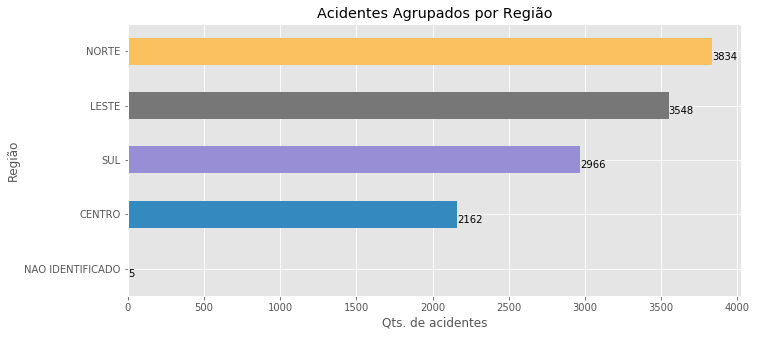

In [85]:
regiao = acidentes.groupby('Regiao')['Contagem'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(11,5))

for p in regiao.patches:
    b=p.get_bbox()
    regiao.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.1))
    
plt.title('Acidentes Agrupados por Região')
plt.xlabel('Qts. de acidentes')
plt.ylabel('Região')
plt.show()

In [86]:
poa = folium.Map(location=[-30.1084987, -51.1915724], zoom_start=11)

for indice, tipo_acidente in acidentes[acidentes['Fatais'] >= 1].iterrows():
    folium.Marker(location=[tipo_acidente['Latitude'], tipo_acidente['Longitude']], popup=tipo_acidente['Motivo_acidente'],
                  icon=folium.map.Icon(color='darkred')
                 ).add_to(poa)
    
poa

Embora ocorra acidentes por toda cidade, as fatalidades estão mais concentrados na zona norte - Bairro Centro e proximidades - da cidade, uma alternatina para diminuir este número seria intensificar a fiscalização na região e talvez até criar postos de emergências para efetuar um atendimento mais ágil as vítimas.

Este número de acidentes e de mortes alto na região, deve-se também a maior quantidade de veículos em deslocamento pois é uma zona com maior concentração de pessoas da cidade - assim realizando uma correlação com a informação do gráfico anterior - , podemos afirmar que conforme as ocorrências crescem, o número de fatalidades também aumenta.

Analisando os dados anteriores nos levam a um ponto muito relevante, pelo motivo de que a moto é um veículo onde a exposição do motorista é muito alta, vamos verificar a quantidade e em quais locais ocorreram os acidentes onde acarretou em fatalidades envolvendo motocicletas.

<h2>As motos são maioria nos acidentes de trânsito da cidade? As mesmas estão mais expostas a fatalidades na capital?</h2>

In [87]:
#Cálculo de envolvimento de motos em acidentes
motos_acidentes = acidentes[acidentes['Moto'] >= 1]['Contagem'].sum() / acidentes['Contagem'].sum()
motos_acidentes

0.2298841390331602

In [88]:
#Cálculo sobre fatalidades de motos em acidentes
calc_porcent_fatalidades_motos = acidentes[acidentes['Moto'] >= 1]
moto_fatal = calc_porcent_fatalidades_motos[calc_porcent_fatalidades_motos['Fatais'] >= 1]['Contagem'].sum()

total_fatal = acidentes[acidentes['Fatais'] >= 1]['Contagem'].sum()

resposta = moto_fatal/total_fatal
resposta

0.3409090909090909

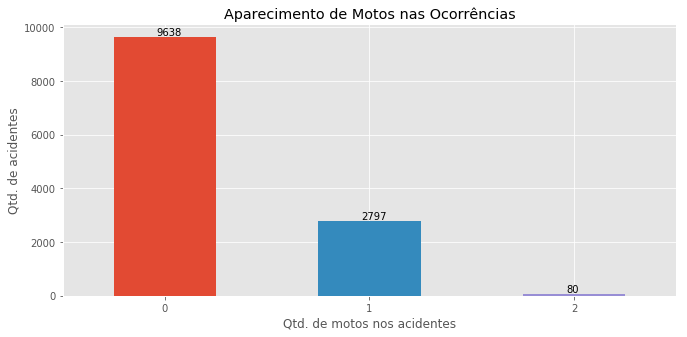

In [89]:
motos = acidentes.groupby('Moto')['Contagem'].sum().plot(kind='bar', figsize=(11,5))

for p in motos.patches:
    b=p.get_bbox()
    motos.annotate("{:.0f}". format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.04, b.y1 + 50))

plt.title('Aparecimento de Motos nas Ocorrências')
plt.xlabel('Qtd. de motos nos acidentes')
plt.ylabel('Qtd. de acidentes')
plt.xticks(rotation=0)
plt.show()

In [90]:
poa_motos = folium.Map(location=[-30.1084987, -51.1915724], zoom_start=11)

fatalidade_motos = acidentes[acidentes['Moto'] >= 1]

for indice, tipo_acidente in fatalidade_motos[fatalidade_motos['Fatais'] >= 1].iterrows():
    folium.Marker(location=[tipo_acidente['Latitude'], tipo_acidente['Longitude']], popup=tipo_acidente['Motivo_acidente'],
                  icon=folium.map.Icon(color='darkred')
                 ).add_to(poa_motos)
    
poa_motos

34% das fatalidades envolvem motos, enquanto estão presentes somente em 22% dos registros de acidentes, o condutor fica muito vulnerável pois a segurança da mesma é muito baixa, confirmando o ponto mencionado anteriormente. A probabilidade de morte das motocicletas é maior em relação aos outros veículos.

Já com referencia a geolocalização das fatalidades envolvendo motos, estão espalhadas pela cidade - não possuindo região especifica onde ocorrem fatalidades - , ao contrário do resto dos dados onde ocorrem principalmente na região norte, definindo assim como uma região mais "segura" para motoqueiros, devido ao alto número de acidentes ocorridos na região e o registro menor de fatalidades envolvendo motos.

<h3>Em quais avenidas ocorreram a maioria dos acidentes? E as fatalidades ocorreram nas mesmas ruas ou a segurança das vias é algo a parte?</h3>

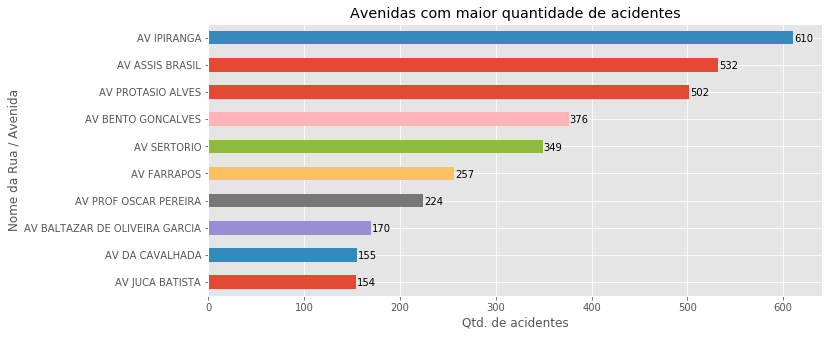

In [91]:
rua = acidentes.groupby('Rua')['Contagem'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(11,5))

for p in rua.patches:
    b=p.get_bbox()
    rua.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1.1, p.get_y() + 0.1))

plt.title('Avenidas com maior quantidade de acidentes')
plt.xlabel('Qtd. de acidentes')
plt.ylabel('Nome da Rua / Avenida')
plt.show()

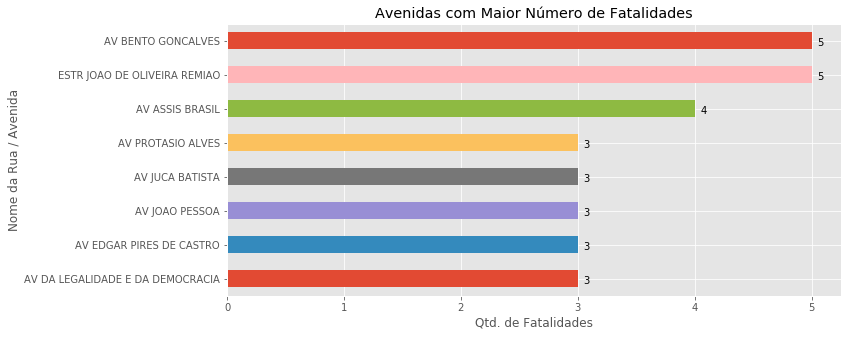

In [92]:
rua_fatal = acidentes[acidentes['Fatais'] >= 1]
rua_fatal_plot = rua_fatal.groupby('Rua')['Contagem'].sum().sort_values(ascending=False).head(8).sort_values(ascending=True).plot(kind='barh', figsize=(11,5))

for p in rua_fatal_plot.patches:
    b=p.get_bbox()
    rua_fatal_plot.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.05, p.get_y() + 0.1))

plt.title('Avenidas com Maior Número de Fatalidades')
plt.xlabel('Qtd. de Fatalidades')
plt.ylabel('Nome da Rua / Avenida')
plt.show()

As avenidas onde ocorrem o maior número de registros, estão todos localizados na zona dita anteriormente, a região norte de Porto Alegre, porém identificamos que metade da lista onde ocorrem mais fatalidades, não estão sequer na lista onde possui maior números de acidentes, indicando que o fator segurança da via - mortes - é irrevelante ao número de acidentes registrados. A segurança destas destas avenidas são algo a parte e precisam de mais atenção com intensificação de sinalização e maior orientação aos usuários das vias.

<h3>As maiores causas dos acidentes são também os maiores motivos das fatalidades?</h3>

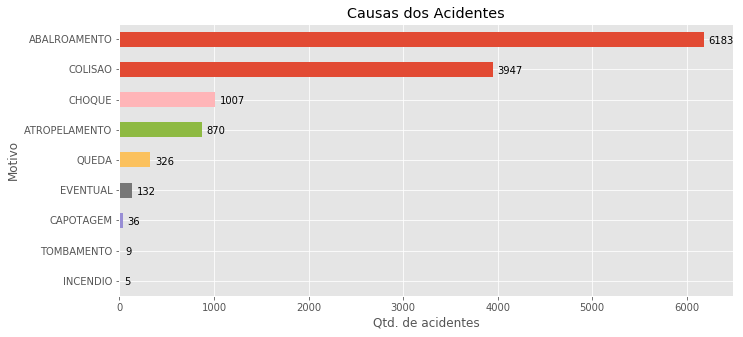

In [93]:
causas = acidentes.groupby('Motivo_acidente')['Contagem'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(11,5))

for p in causas.patches:
    b=p.get_bbox()
    causas.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 50, p.get_y() + 0.1))

plt.title('Causas dos Acidentes')
plt.xlabel('Qtd. de acidentes')
plt.ylabel('Motivo')
plt.show()

Para visualização do gráfico, primeiramente devemos entender a diferença entre os termos abalroamento, colisão e choque.

ABALROAMENTO – Batida na lateral de um veículo em movimento, num cruzamento.
COLISÃO – Batida em outro veículo em movimento na mesma direção ou direção contrária.
CHOQUE – Batida em um veículo parado ou outro objeto fixo na via (poste, árvore, etc).

Validamos que a maioria dos acidentes ocorre em batidas, cerca de 89% das ocorrências, o abalroamento que está em primeiro lugar, deve-se primeiramente ao furar o sinal fechado, gerando uma batida na lateral do veículo. Mas qual o motivo de acidente que gera mais mortes na capital?

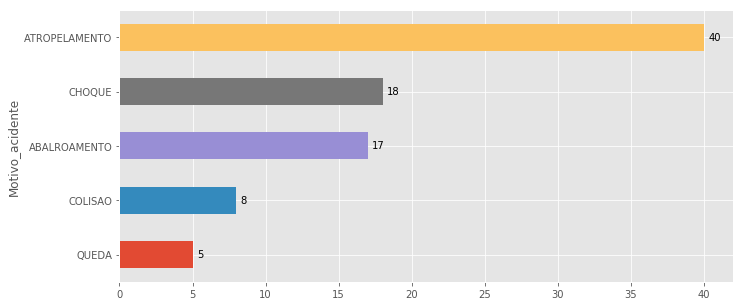

In [94]:
motivo = rua_fatal.groupby('Motivo_acidente')['Contagem'].sum().sort_values(ascending=False).head(8).sort_values(ascending=True).plot(kind='barh', figsize=(11,5))

for p in motivo.patches:
    b=p.get_bbox()
    motivo.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.3, p.get_y() + 0.2))


No topo, com um número onde possui elevação superior a 100% em relação aos demais, os atropelamentos lideram a lista onde o acidente acarretou em fatalidade, ao contrário do que vem primeiramente a mente, estes não são causados exclusivamente pelos motoristas, também pode ocorrer uma imprudência do pedestre. Seria necessário criar mais faixas de pedestres e intensificar reparos nas já existentes, além de um trabalho para uma maior conscientização, tanto de motoristas quanto para pedestres.

Note que os atropelamentos não está entre os maiores motivos de acidentes, porém é a imprudência que mais matou na capital em 2016.

<h2>Conclusão</h2>

Pelo fato da frota de veículos possuir um número muito alto, e subsequente um valor elevado de acidentes, fica evidente que a prefeitura deveria buscar alternativas para o problema de trânsito, como desenvolver metrô, criação de mais ciclofaixas para utilização de bicicletas ou até mesmo investir em transporte hidroviário, pois o Rio Guaíba percorre grande parte da cidade, pensando primeiramente em "desafogar" o norte da cidade. A preferência pelo carro é reflexo de uma supervalorização do sistema rodoviário no país nas últimas décadas e dos incentivos dados pelo governo.

Observando as informações, concluímos que as vias da região norte precisam ser utilizadas com uma maior atenção, e necessitam de maior ajustes e cuidados, principalmente para diminuir os números de acidentes. Embora não seja a maior causa das ocorrências, os atropelamentos foram os maiores motivos de fatalidades em 2016, exigindo cautela do motorista e conscientização do pedestre também - utilizar as faixas de segurança e atenção ao atravessar as vias - , além de que as motocicletas possuem uma probabilidade de morte maior em relação aos outros veículos devido a alta exposição do condutor. A utilização das vias em Porto Alegre implicam em uma atenção redrobrada, pelo fato de que além do condutor ficar atento a sí, é necessário uma atenção aos outros veículos, pois as maiores causas de acidentes, são recorrentes as batidas.